## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf

## Importing the data of the stock price of the Apple

In [2]:
yf.pdr_override()
# previous 10 year data of the stock price
df_aapl = pdr.DataReader("AAPL", start=datetime(2013,1,1), end=datetime(2023, 10, 1))

[*********************100%%**********************]  1 of 1 completed


In [324]:
#df_aapl.to_csv('apple.csv')  # uncomment this to take out the dataset

In [3]:
df_aapl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,19.779285,19.821428,19.343929,19.608213,16.791189,560518000
2013-01-03,19.567142,19.631071,19.321428,19.360714,16.579243,352965200
2013-01-04,19.177500,19.236786,18.779642,18.821428,16.117434,594333600
2013-01-07,18.642857,18.903570,18.400000,18.710714,16.022623,484156400
2013-01-08,18.900356,18.996071,18.616072,18.761070,16.065746,458707200


In [4]:
df_aapl.shape

(2705, 6)

## Visualization

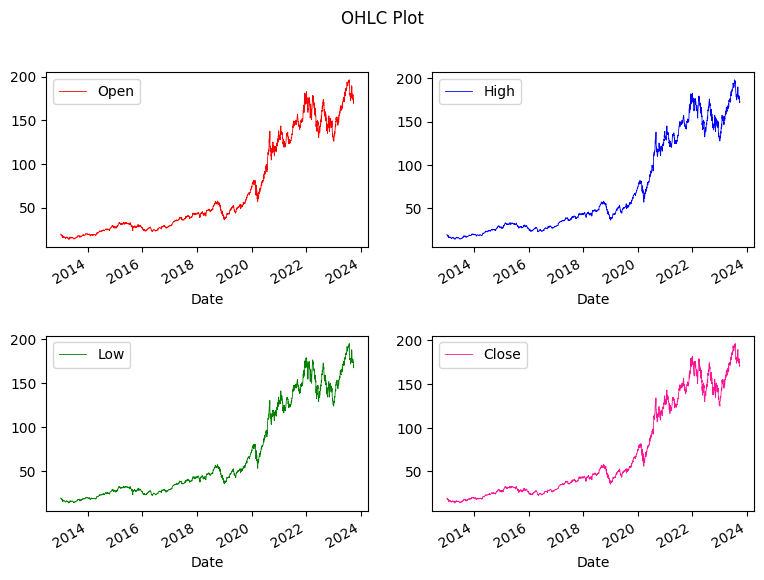

In [5]:
plt.figure(figsize=(8, 6))

plt.subplot(2,2,1)
df_aapl['Open'].plot(c='r',linewidth=0.6)
plt.legend(['Open'])

plt.subplot(2,2,2)
df_aapl['High'].plot(c='b',linewidth=0.6)
plt.legend(['High'])

plt.subplot(2,2,3)
df_aapl['Low'].plot(c='g',linewidth=0.6)
plt.legend(['Low'])

plt.subplot(2,2,4)
df_aapl['Close'].plot(c='deeppink',linewidth=0.6)
plt.legend(['Close'])

plt.suptitle("OHLC Plot")
plt.tight_layout(pad=2)
plt.show()

#### Forecasting of the data using Close price of the stock

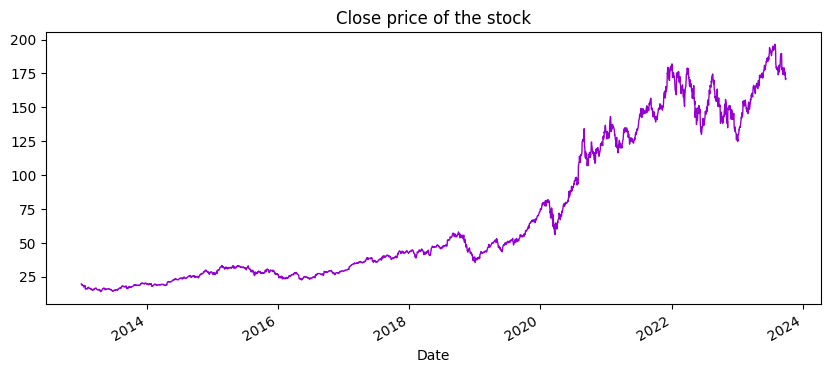

In [6]:
df_aapl['Close'].plot(figsize=(10,4),linewidth=1,c='darkviolet');
plt.title('Close price of the stock');

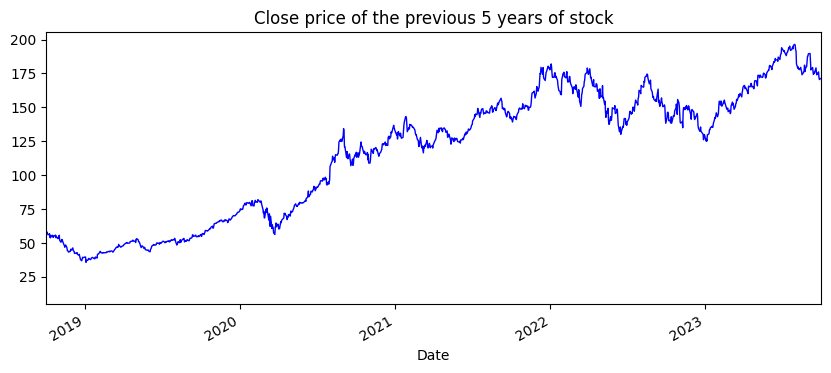

In [7]:
df_aapl['Close'].plot(figsize=(10,4),c='blue',linewidth=1);
plt.title('Close price of the previous 5 years of stock');
plt.xlim('2018-10-01','2023-10-01');

In [8]:
df_close=df_aapl[['Close']]

In [9]:
df_close.head()

,Close
Date,
2013-01-02,19.608213
2013-01-03,19.360714
2013-01-04,18.821428
2013-01-07,18.710714
2013-01-08,18.761070


In [10]:
# Converting the dataframe to numpy array
df_arr=np.array(df_close).reshape(-1,1)

In [11]:
df_arr

array([[ 19.60821342],
       [ 19.36071396],
       [ 18.8214283 ],
       ...,
       [170.42999268],
       [170.69000244],
       [171.21000671]])

## Spliting the dataset into training set and test set

In [12]:
training_size=int(len(df_arr)*0.75)

In [13]:
train_data=df_arr[:training_size]

In [14]:
test_data=df_arr[training_size:]

## Feature engineering

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
train_data=scaler.fit_transform(train_data)

In [16]:
train_data

array([[0.04605108],
       [0.04403762],
       [0.03965042],
       ...,
       [0.92645778],
       [0.96062563],
       [1.        ]])

In [17]:
test_data=scaler.transform(test_data)

In [18]:
test_data

array([[1.01789756],
       [1.04921803],
       [1.05117052],
       [1.04222175],
       [1.00178976],
       [0.96005623],
       [0.97779092],
       [0.98470589],
       [0.9761639 ],
       [1.00423034],
       [0.99910512],
       [1.00032548],
       [0.99300372],
       [0.98795993],
       [0.98584482],
       [0.98779719],
       [0.9700625 ],
       [0.95094471],
       [0.94175201],
       [0.94305355],
       [0.91157033],
       [0.91043141],
       [0.90628244],
       [0.87081293],
       [0.87300947],
       [0.92613236],
       [0.90441137],
       [0.8795176 ],
       [0.86381664],
       [0.87431107],
       [0.83314694],
       [0.87162644],
       [0.86259641],
       [0.87870409],
       [0.87113834],
       [0.89521855],
       [0.90807219],
       [0.90148269],
       [0.86707074],
       [0.86267772],
       [0.89033744],
       [0.88342252],
       [0.86349123],
       [0.86755883],
       [0.87260268],
       [0.87406702],
       [0.86194558],
       [0.880

## Creating Dataset

In [19]:
def dataset(df,time_steps=30):
    X_tr=[]
    y_tr=[]
    for i in range(len(df)-time_steps-1):
        x=df[i:i+time_steps,0]
        y=df[i+time_steps:i+time_steps+1,0]
        X_tr.append(x)
        y_tr.append(y)
    return np.array(X_tr), np.array(y_tr)

In [20]:
time_steps=100
X_train,y_train=dataset(train_data,time_steps)
X_test,y_test=dataset(test_data,time_steps)

In [21]:
X_train

array([[0.04605108, 0.04403762, 0.03965042, ..., 0.0147654 , 0.01499493,
        0.01586946],
       [0.04403762, 0.03965042, 0.03874974, ..., 0.01499493, 0.01586946,
        0.01479154],
       [0.03965042, 0.03874974, 0.03915939, ..., 0.01586946, 0.01479154,
        0.01581135],
       ...,
       [0.91041105, 0.90201144, 0.91582097, ..., 0.93434894, 0.95135149,
        0.93524382],
       [0.90201144, 0.91582097, 0.9035165 , ..., 0.95135149, 0.93524382,
        0.92084447],
       [0.91582097, 0.9035165 , 0.90186912, ..., 0.93524382, 0.92084447,
        0.92645778]])

In [22]:
y_train

array([[0.01479154],
       [0.01581135],
       [0.01773766],
       ...,
       [0.92084447],
       [0.92645778],
       [0.96062563]])

In [23]:
# reshape input which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

## Create LSTM model 

In [24]:
# Importing libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv1D

In [25]:
# creating model
model=Sequential()
model.add(Conv1D(filters=64, kernel_size=3,
                      strides=1,
                      activation="relu",
                      padding='causal',
                      input_shape=[time_steps, 1]))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(30, activation="relu"))
model.add(Dense(1))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 100, 64)           256       
                                                                 
 lstm (LSTM)                 (None, 100, 50)           23000     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 30)                1530      
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 45017 (175.85 KB)
Trainable params: 45017 (175.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Train the model

In [27]:
learning_rate = 0.001 
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Set the training parameters
model.compile(optimizer=optimizer, loss=tf.keras.losses.Huber(), metrics=['mae'])

In [28]:
# Train the model
model_history=model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
31/31 [==============================] - 22s 273ms/step - loss: 0.0078 - mae: 0.0751
Epoch 2/100
31/31 [==============================] - 8s 259ms/step - loss: 4.0107e-04 - mae: 0.0185
Epoch 3/100
31/31 [==============================] - 9s 275ms/step - loss: 2.7413e-04 - mae: 0.0145
Epoch 4/100
31/31 [==============================] - 10s 317ms/step - loss: 2.2319e-04 - mae: 0.0129
Epoch 5/100
31/31 [==============================] - 12s 380ms/step - loss: 2.2089e-04 - mae: 0.0129
Epoch 6/100
31/31 [==============================] - 11s 370ms/step - loss: 2.1267e-04 - mae: 0.0126
Epoch 7/100
31/31 [==============================] - 10s 332ms/step - loss: 2.1153e-04 - mae: 0.0126
Epoch 8/100
31/31 [==============================] - 12s 370ms/step - loss: 2.1070e-04 - mae: 0.0126
Epoch 9/100
31/31 [==============================] - 10s 306ms/step - loss: 2.0138e-04 - mae: 0.0122
Epoch 10/100
31/31 [==============================] - 9s 277ms/step - loss: 1.9773e-04 - mae: 0.0

31/31 [==============================] - 7s 241ms/step - loss: 5.6619e-05 - mae: 0.0067
Epoch 83/100
31/31 [==============================] - 8s 261ms/step - loss: 5.9446e-05 - mae: 0.0067
Epoch 84/100
31/31 [==============================] - 8s 264ms/step - loss: 4.8853e-05 - mae: 0.0060
Epoch 85/100
31/31 [==============================] - 8s 258ms/step - loss: 6.8063e-05 - mae: 0.0076
Epoch 86/100
31/31 [==============================] - 8s 260ms/step - loss: 5.4667e-05 - mae: 0.0066
Epoch 87/100
31/31 [==============================] - 8s 273ms/step - loss: 5.0681e-05 - mae: 0.0062
Epoch 88/100
31/31 [==============================] - 9s 285ms/step - loss: 5.1123e-05 - mae: 0.0062
Epoch 89/100
31/31 [==============================] - 8s 271ms/step - loss: 4.9579e-05 - mae: 0.0060
Epoch 90/100
31/31 [==============================] - 8s 255ms/step - loss: 5.1995e-05 - mae: 0.0063
Epoch 91/100
31/31 [==============================] - 9s 277ms/step - loss: 4.9906e-05 - mae: 0.0062
Epo

## Model prediction

In [29]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

18/18 [==============================] - 1s 69ms/step


In [30]:
train_predict

array([[0.01472931],
       [0.01502706],
       [0.01530606],
       ...,
       [0.93971264],
       [0.9211806 ],
       [0.9271829 ]], dtype=float32)

In [31]:
scaler.inverse_transform(train_predict)

array([[ 15.758064],
       [ 15.794665],
       [ 15.828958],
       ...,
       [129.45932 ],
       [127.18131 ],
       [127.919136]], dtype=float32)

In [32]:
##Transform back to the original form
train_pred=scaler.inverse_transform(train_predict)
test_pred=scaler.inverse_transform(test_predict)

In [33]:
test_pred

array([[130.10739 ],
       [129.81816 ],
       [131.62231 ],
       [130.73665 ],
       [131.79115 ],
       [133.90836 ],
       [133.571   ],
       [133.04457 ],
       [132.92178 ],
       [134.37883 ],
       [136.03581 ],
       [136.46492 ],
       [136.59044 ],
       [138.89421 ],
       [141.05858 ],
       [143.02794 ],
       [142.01704 ],
       [143.12035 ],
       [143.38127 ],
       [143.92647 ],
       [147.3899  ],
       [147.00168 ],
       [144.48804 ],
       [141.25847 ],
       [144.4454  ],
       [144.97115 ],
       [145.02072 ],
       [146.99648 ],
       [147.17314 ],
       [145.0126  ],
       [143.26913 ],
       [144.18556 ],
       [144.73799 ],
       [144.21968 ],
       [145.72444 ],
       [145.64215 ],
       [145.2728  ],
       [144.70366 ],
       [144.54039 ],
       [144.34996 ],
       [144.49527 ],
       [147.24063 ],
       [147.6768  ],
       [148.81075 ],
       [148.39148 ],
       [144.62463 ],
       [144.92142 ],
       [147.0

## Model evaluation

In [49]:
from sklearn.metrics import mean_squared_error
rmse_train=round(np.sqrt(mean_squared_error(y_train,train_pred)),2)
print("Root mean squared error of training set: {}".format(rmse_train))

Root mean squared error of training set: 49.79


In [51]:
np.sqrt(mean_squared_error(y_test,test_pred))
rmse_test=round(np.sqrt(mean_squared_error(y_test,test_pred)),2)
print("Root mean squared error of test set: {}".format(rmse_test))

Root mean squared error of test set: 154.48


#### Ploting mae(mean absolute error) vs epochs and loss vs epochs 

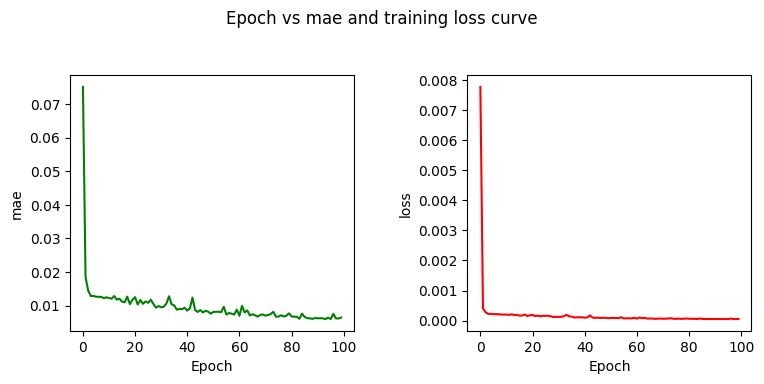

In [126]:
# Get mae and loss from history log
mae=model_history.history['mae']
loss=model_history.history['loss']
# Get number of epochs
epochs_val=range(len(loss))

plt.figure(figsize=(8, 4))

plt.subplot(1,2,1)
plt.plot(epochs_val,mae,c='green')
plt.xlabel('Epoch')
plt.ylabel('mae')

plt.subplot(1,2,2)
plt.plot(epochs_val,loss,c='r')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.suptitle("Epoch vs mae and training loss curve")
plt.tight_layout(pad=2,w_pad=3)
plt.show()

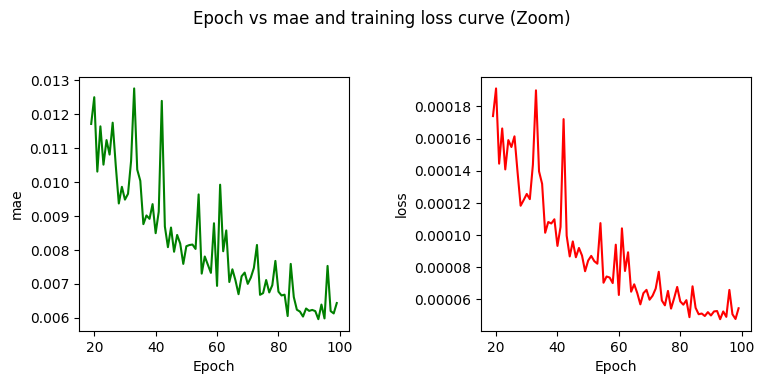

In [132]:
# Plotting the last 80% of the epochs i.e. from epoch 20 to 100
split = int(epochs_val[-1] * 0.2)
plt.figure(figsize=(8, 4))

plt.subplot(1,2,1)
plt.plot(epochs_val[split:],mae[split:],c='green')
plt.xlabel('Epoch')
plt.ylabel('mae')

plt.subplot(1,2,2)
plt.plot(epochs_val[split:],loss[split:],c='r')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.suptitle("Epoch vs mae and training loss curve (Zoom)")
plt.tight_layout(pad=2,w_pad=3)
plt.show()

## Visualization of the model on the training set and test set

#### visualization on the training set

In [54]:
x_train=np.arange(len(y_train))

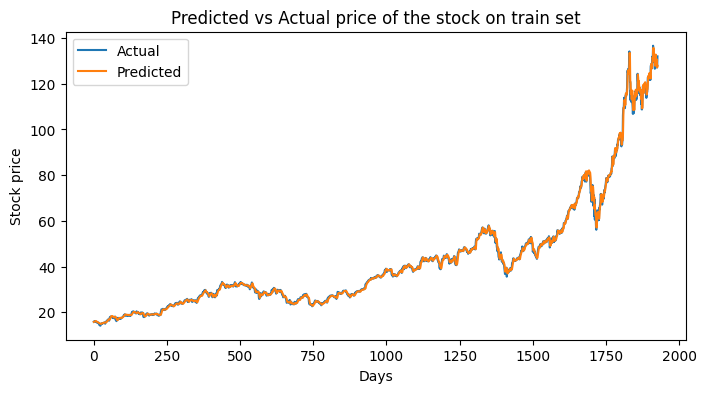

In [94]:
plt.figure(figsize=(8,4))
plt.plot(x_train,scaler.inverse_transform(y_train),label='Actual')
plt.plot(x_train,train_pred,label='Predicted')
plt.legend()
plt.title('Predicted vs Actual price of the stock on train set')
plt.xlabel('Days')
plt.ylabel('Stock price')
plt.show()

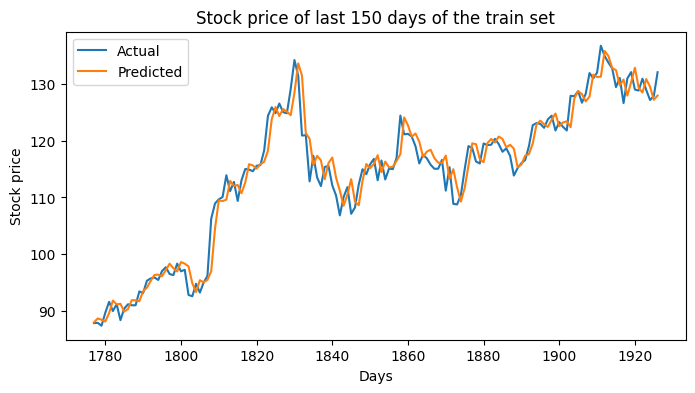

In [97]:
plt.figure(figsize=(8,4))
plt.plot(x_train[len(x_train)-150:],scaler.inverse_transform(y_train[len(y_train)-150:]),label='Actual')
plt.plot(x_train[len(x_train)-150:],train_pred[len(train_pred)-150:],label='Predicted')
plt.title('Stock price of last 150 days of the train set')
plt.xlabel('Days')
plt.ylabel('Stock price')
plt.legend()
plt.show()

#### Visualization on the test set

In [99]:
x_test=np.arange(len(y_test))

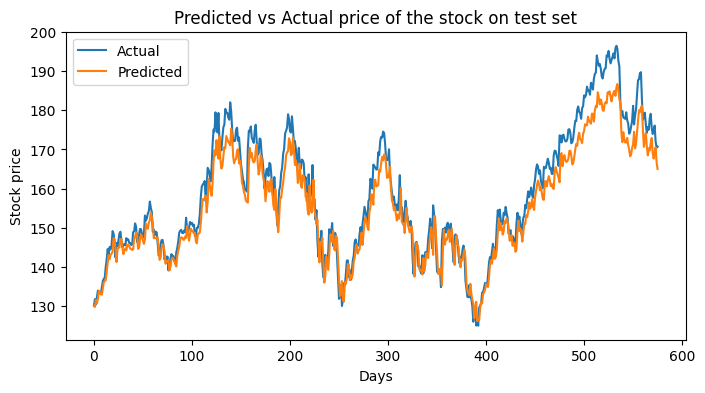

In [101]:
plt.figure(figsize=(8,4))
plt.plot(x_test,scaler.inverse_transform(y_test),label='Actual')
plt.plot(x_test,test_pred,label='Predicted')
plt.legend()
plt.title('Predicted vs Actual price of the stock on test set')
plt.xlabel('Days')
plt.ylabel('Stock price')
plt.show()

## Prediction for the next 150 days

In [317]:
val=X_test[len(X_test)-1]
pred_set=val.reshape(1,100,1)
forecast=[]
days=150
for i in range(days):
    pred_val=model.predict(pred_set)
    pred_set=pred_set[0,1:]
    pred_set=pred_set.tolist()
    pred_val=pred_val.tolist()[0]
    forecast.append(pred_val)
    pred_set.append(pred_val)
    pred_set=np.array(pred_set)
    pred_set=pred_set.reshape(1,100,1)

1/1 [==============================] - 0s 111ms/step


In [318]:
forecast

[[1.2288404703140259],
 [1.197482705116272],
 [1.1679894924163818],
 [1.1485975980758667],
 [1.1320877075195312],
 [1.1189303398132324],
 [1.1064726114273071],
 [1.0950003862380981],
 [1.0841114521026611],
 [1.0741934776306152],
 [1.0652923583984375],
 [1.057542085647583],
 [1.0508897304534912],
 [1.045263648033142],
 [1.0405306816101074],
 [1.0365612506866455],
 [1.0332244634628296],
 [1.0304069519042969],
 [1.0280078649520874],
 [1.0259417295455933],
 [1.0241343975067139],
 [1.0225224494934082],
 [1.021051287651062],
 [1.0196751356124878],
 [1.018355369567871],
 [1.0170612335205078],
 [1.0157692432403564],
 [1.0144621133804321],
 [1.0131282806396484],
 [1.0117619037628174],
 [1.0103603601455688],
 [1.0089255571365356],
 [1.0074609518051147],
 [1.005972981452942],
 [1.0044686794281006],
 [1.002956509590149],
 [1.0014448165893555],
 [0.999942421913147],
 [0.9984575510025024],
 [0.9969979524612427],
 [0.9955703616142273],
 [0.9941810369491577],
 [0.9928350448608398],
 [0.991536736488342

In [319]:
forecast_p=scaler.inverse_transform(forecast)

In [320]:
ind=x_test[len(x_test)-1]

In [321]:
fore_ind=[i+ind for i in range(days)]

In [322]:
fore_ind=np.array(fore_ind)

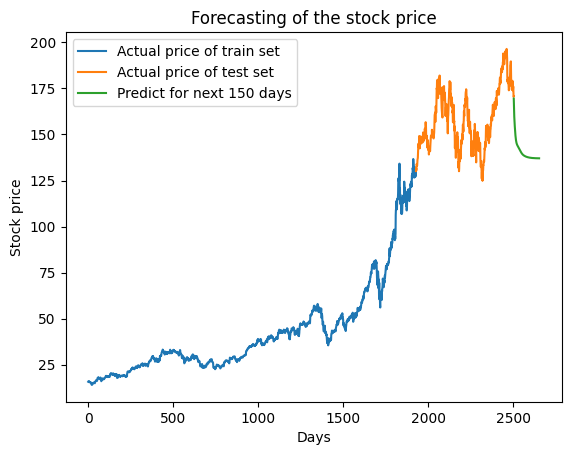

In [323]:
plt.plot(x_train,scaler.inverse_transform(y_train),label='Actual price of train set')
plt.plot(x_test+len(x_train),scaler.inverse_transform(y_test),label='Actual price of test set')
plt.plot(fore_ind+len(x_train),forecast_p+4.5,label='Predict for next {} days'.format(days))
plt.title('Forecasting of the stock price')
plt.xlabel('Days')
plt.ylabel('Stock price')
plt.legend()
plt.show()